In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

In [2]:
dataset_path = dataset_path = '../../dataset/google_review_ratings.csv'   
data = pd.read_csv(dataset_path)

In [3]:
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [4]:
data.shape

(5456, 26)

In [5]:
# Konvertovanje svih kolona sa ocenama u numeričke vrednosti (float)
rating_columns = data.columns[1:]
data[rating_columns] = data[rating_columns].apply(pd.to_numeric, errors='coerce')

print(data[rating_columns].dtypes)

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object


In [6]:
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [7]:
#Drop-ujem kolone User i Unnamed
data = data.drop('User', axis=1) 
data = data.drop('Unnamed: 25', axis = 1)

In [8]:
#preimenovanje kolona
new_column_names = {
    'Category 1': 'AverageRatingsChurches',
    'Category 2': 'AverageRatingsResorts',
    'Category 3': 'AverageRatingsBeaches',
    'Category 4': 'AverageRatingsParks',
    'Category 5': 'AverageRatingsTheatres',
    'Category 6': 'AverageRatingsMuseums',
    'Category 7': 'AverageRatingsMalls',
    'Category 8': 'AverageRatingsZoo',
    'Category 9': 'AverageRatingsRestaurants',
    'Category 10': 'AverageRatingsPubsBars',
    'Category 11': 'AverageRatingsLocalServices',
    'Category 12': 'AverageRatingsBurgerPizzaShops',
    'Category 13': 'AverageRatingsHotelsLodgings',
    'Category 14': 'AverageRatingsJuiceBars',
    'Category 15': 'AverageRatingsArtGalleries',
    'Category 16': 'AverageRatingsDanceClubs',
    'Category 17': 'AverageRatingsSwimmingPools',
    'Category 18': 'AverageRatingsGyms',
    'Category 19': 'AverageRatingsBakeries',
    'Category 20': 'AverageRatingsBeautySpas',
    'Category 21': 'AverageRatingsCafes',
    'Category 22': 'AverageRatingsViewPoints',
    'Category 23': 'AverageRatingsMonuments',
    'Category 24': 'AverageRatingsGardens'
}

data.rename(columns=new_column_names, inplace=True)

print(data.columns)

Index(['AverageRatingsChurches', 'AverageRatingsResorts',
       'AverageRatingsBeaches', 'AverageRatingsParks',
       'AverageRatingsTheatres', 'AverageRatingsMuseums',
       'AverageRatingsMalls', 'AverageRatingsZoo', 'AverageRatingsRestaurants',
       'AverageRatingsPubsBars', 'AverageRatingsLocalServices',
       'AverageRatingsBurgerPizzaShops', 'AverageRatingsHotelsLodgings',
       'AverageRatingsJuiceBars', 'AverageRatingsArtGalleries',
       'AverageRatingsDanceClubs', 'AverageRatingsSwimmingPools',
       'AverageRatingsGyms', 'AverageRatingsBakeries',
       'AverageRatingsBeautySpas', 'AverageRatingsCafes',
       'AverageRatingsViewPoints', 'AverageRatingsMonuments',
       'AverageRatingsGardens'],
      dtype='object')


In [9]:
# Statisticke informacije o numerickim kolonama
data.describe()

,AverageRatingsChurches,AverageRatingsResorts,AverageRatingsBeaches,AverageRatingsParks,AverageRatingsTheatres,AverageRatingsMuseums,AverageRatingsMalls,AverageRatingsZoo,AverageRatingsRestaurants,AverageRatingsPubsBars,...,AverageRatingsArtGalleries,AverageRatingsDanceClubs,AverageRatingsSwimmingPools,AverageRatingsGyms,AverageRatingsBakeries,AverageRatingsBeautySpas,AverageRatingsCafes,AverageRatingsViewPoints,AverageRatingsMonuments,AverageRatingsGardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
#provera NaN vrednosti
nan_check = data.isna().sum()
print(nan_check)

AverageRatingsChurches            0
AverageRatingsResorts             0
AverageRatingsBeaches             0
AverageRatingsParks               0
AverageRatingsTheatres            0
AverageRatingsMuseums             0
AverageRatingsMalls               0
AverageRatingsZoo                 0
AverageRatingsRestaurants         0
AverageRatingsPubsBars            0
AverageRatingsLocalServices       1
AverageRatingsBurgerPizzaShops    1
AverageRatingsHotelsLodgings      0
AverageRatingsJuiceBars           0
AverageRatingsArtGalleries        0
AverageRatingsDanceClubs          0
AverageRatingsSwimmingPools       0
AverageRatingsGyms                0
AverageRatingsBakeries            0
AverageRatingsBeautySpas          0
AverageRatingsCafes               0
AverageRatingsViewPoints          0
AverageRatingsMonuments           0
AverageRatingsGardens             1
dtype: int64


In [11]:
# Zamena NaN vrednosti prosekom po koloni -> zadržacemo podatke u skupu umesto da ih izbacimo
data = data.fillna(data.mean())

In [12]:
data

,AverageRatingsChurches,AverageRatingsResorts,AverageRatingsBeaches,AverageRatingsParks,AverageRatingsTheatres,AverageRatingsMuseums,AverageRatingsMalls,AverageRatingsZoo,AverageRatingsRestaurants,AverageRatingsPubsBars,...,AverageRatingsArtGalleries,AverageRatingsDanceClubs,AverageRatingsSwimmingPools,AverageRatingsGyms,AverageRatingsBakeries,AverageRatingsBeautySpas,AverageRatingsCafes,AverageRatingsViewPoints,AverageRatingsMonuments,AverageRatingsGardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


Posto se u kolonama vec nalaze prosecne ocene koje su korisnici dali za određene atrakcije, onda mozemo koristiti te prosečne ocene kao ciljnu promenljivu za klasifikaciju. 

Na primer: klasifikovacemo ocene korisnika u tri kategorije: "niska," "srednja" i "visoka."
Posto su ocene u opsegu od 0 do 5, postavljamo pragove na osnovu kojih ćemo kategorizovati ocene (biramo ih tako da ravnomerno podelimo opseg ocena).

    Ako je prosečna ocena za atrakciju manja od 1.7, označavamo je kao "niska."
    Ako je prosečna ocena za atrakciju veća od 1.7 i manja od 3.4, označavamo je kao "srednja."
    Ako je prosečna ocena za atrakciju veća od 3.4, označavamo je kao "visoka."

In [13]:
# Funkcija za kategorizaciju
def categorize_rating(rating):
    if rating < 1.7:
        return "niska"
    elif rating >= 1.7 and rating < 3.4:
        return "srednja"
    else:
        return "visoka"

In [14]:
# Primena funkcije na postojeće prosecne ocene i kreiranje nove ciljne kolone
data['CategorizedRatings'] = data['AverageRatingsChurches'].apply(categorize_rating)

In [15]:
data['CategorizedRatings'].value_counts()['visoka']

196

In [16]:
data['CategorizedRatings'].value_counts()['srednja']

1356

In [17]:
data['CategorizedRatings'].value_counts()['niska']

3904

In [18]:
#Vidimo da su podaci nebalansirani i to nas navodi da treba da iskoristimo parametar class_weights
#postavljamo class_weight='balanced' i onda ce model sam da odredi tezine koje su proporcionalne broju instanci u skupu

<!-- Podela podataka na trening, validacioni i test skup kako bismo trenirali modele, optimizovali ih i testirali njihovu tacnost. -->

Podela podataka na trening, validacioni i test skup igra ključnu ulogu u našem procesu analize. 

Prvo koristimo trening skup kako bismo obučili naše modele omogućavajući im da nauče zakonitosti i obrasce u podacima. 
Nakon toga, koristimo validacioni skup kako bismo optimizovalali modele, podešavajući hiperparametre i vršeći evaluaciju performansi.
Na kraju, test skup nam omogućava da nepristrasno procenimo tačnost i performanse naših obučenih modela na potpuno novim i neviđenim podacima.

In [19]:
X = data.drop(['AverageRatingsChurches', 'CategorizedRatings'], axis=1)  # Ulazni atributi
y = data['CategorizedRatings']  # Ciljna promenljiva

# Podelili smo podatke u trening, validacioni i test skup u odnosu 70-15-15.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Odabir tri različita modela za klasifikaciju i primena Grid Search-a za optimizaciju parametara tih modela.
# 1. Logistička regresija
# 2. Random Forest
# 3. Support Vector Machine
Nakon što optimizujemo parametre, uporedićemo performanse ovih modela kako bismo odabrali najbolji model za naše podatke.

# Logistička regresija

In [20]:
# Definisanje opsega hiperparametara
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  #C je hiperparametar za kontrolu jačine regularizacije
    'solver': ['lbfgs', 'liblinear', 'newton-cg']
}

In [21]:
# Kreiranje modela za višeklasnu logističku regresiju
logistic_model = LogisticRegression(multi_class='multinomial', class_weight='balanced')

In [22]:
# Inicijalizacija GridSearchCV objekta
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

In [23]:
# Grid Search na trening podacima
grid_search.fit(X_train, y_train)

/home/oem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/oem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/oem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [24]:
# Najbolji model i najbolji parametri
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [25]:
print("Najbolji model:", best_model)

Najbolji model: LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial',
                   solver='newton-cg')


In [26]:
print("Najbolji parametri:", best_params)

Najbolji parametri: {'C': 0.1, 'solver': 'newton-cg'}


In [27]:
# Koristimo model sa najboljim parametrima
best_logistic_model = LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial', solver='newton-cg')

In [28]:
best_logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', multi_class='multinomial',
                   solver='newton-cg')

In [29]:
# Predviđanje na validacionom skupu
y_val_pred = best_logistic_model.predict(X_val)

In [30]:
# Evaluacija modela
# Računanje tačnosti
accuracy = accuracy_score(y_val, y_val_pred)
print("Tačnost:", accuracy)

Tačnost: 0.7334963325183375


Tačnost (accuracy) je mera koja nam govori koliko tačnih predikcija model daje u odnosu na ukupan broj instanci u validacionom skupu. U ovom slučaju, tačnost iznosi 0.73, što znači da je model tačno klasifikovao oko 73% instanci na validacionom skupu.

In [31]:
# Izveštaj o klasifikaciji
report = classification_report(y_val, y_val_pred)
print("Izveštaj o klasifikaciji:\n", report)

Izveštaj o klasifikaciji:
               precision    recall  f1-score   support

       niska       0.92      0.75      0.83       580
     srednja       0.63      0.66      0.64       210
      visoka       0.22      0.96      0.36        28

    accuracy                           0.73       818
   macro avg       0.59      0.79      0.61       818
weighted avg       0.82      0.73      0.76       818



Ovaj izveštaj pruža detaljne informacije o performansama modela za svaku od klasa. Na primer, za klasu "niska" (low) preciznost iznosi 0.92, što znači da je model tačno klasifikovao 92% instanci koje pripadaju toj klasi. Recall (odziv) za istu klasu iznosi 0.75, što ukazuje na to da je model identifikovao 75% instanci te klase. F1-skor je harmonijska sredina preciznosti i odziva i iznosi 0.83 za "niska" klasu. Izveštaj pruža informacije za sve tri klase.

In [32]:
# ROC krive i AUC vrednosti (za svaku klasu)
y_val_probs = best_logistic_model.predict_proba(X_val)
n_classes = len(best_logistic_model.classes_)

In [33]:
# Za svaku klasu
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val, y_val_probs[:, i], pos_label=best_logistic_model.classes_[i])
    roc_auc = auc(fpr, tpr)
    print(f"AUC za klasu {best_logistic_model.classes_[i]}:", roc_auc)
    

AUC za klasu niska: 0.8890683859750798
AUC za klasu srednja: 0.8728540100250628
AUC za klasu visoka: 0.9717902350813743


ROC (Receiver Operating Characteristic) kriva i AUC (Area Under the Curve) vrednosti koriste se za procenu performansi modela u pogledu procene verovatnoća za različite klase. AUC vrednosti se koriste za merenje koliko dobro model razdvaja klase. 

Naš model ima dobre AUC vrednosti za sve tri klase: visoka (0.97), srednja (0.87) i niska (0.88). Visoka AUC vrednost ukazuje na dobro razdvajanje klasa.

In [34]:
# Matrica konfuzije
confusion = confusion_matrix(y_val, y_val_pred)
print("Matrica konfuzije:\n", confusion)

Matrica konfuzije:
 [[435  82  63]
 [ 38 138  34]
 [  1   0  27]]


Matrica konfuzije prikazuje broj tačnih i netačnih klasifikacija za svaku od klasa. Iz matrice možemo videti da model dobro radi u klasifikaciji "niska" i "srednja" klasa, dok ima manje uspeha sa "visoka" klasom.

    Zakljucak: 
    Model logističke regresije se čini da je najbolji u identifikaciji "visokih" ocena, ali ima prostora za poboljšanja u klasifikaciji "niskih" i "srednjih" ocena.

# Random Forest

    Primena grid search-a za model Random Forest kako bismo pronašli optimalne hiperparametre.

In [35]:
#Definisanje parametara za pretragu
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced', None]
}

In [36]:
# Kreiranje modela
rf_model = RandomForestClassifier(random_state=42)

In [37]:
# Inicijalizacija GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

In [38]:
# Treniranje modela na trening skupu
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [39]:
# Najbolji model i parametri
best_rf_model = grid_search.best_estimator_
print("Najbolji model:", best_rf_model)

Najbolji model: RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)


In [40]:
best_params = grid_search.best_params_
print("Najbolji parametri:", best_params)

Najbolji parametri: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}


In [41]:
#model sa najboljim parametrima
best_rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)

In [42]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [43]:
# Predviđanje na validacionom skupu
y_val_pred_rf = best_rf_model.predict(X_val)

In [44]:
# Evaluacija modela
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("Tačnost:", accuracy_rf)

Tačnost: 0.9425427872860636


Tačnost modela (Accuracy) iznosi 0.942, što ukazuje na dobru sposobnost modela da tačno klasifikuje instance.

In [45]:
# Izveštaj o klasifikaciji
report_rf = classification_report(y_val, y_val_pred_rf)
print("Izveštaj o klasifikaciji:\n", report_rf)

Izveštaj o klasifikaciji:
               precision    recall  f1-score   support

       niska       0.94      0.98      0.96       580
     srednja       0.94      0.88      0.91       210
      visoka       0.90      0.64      0.75        28

    accuracy                           0.94       818
   macro avg       0.93      0.83      0.87       818
weighted avg       0.94      0.94      0.94       818



Iz izveštaja o klasifikaciji možemo videti preciznost, odziv (recall) i F1-skor za svaku od klasa (niska, srednja, visoka). 

Visoka preciznost i odziv za nisku i srednju klasu ukazuju na dobro modeliranje ovih klasa, dok niži odziv i preciznost za visoku klasu sugerišu da model ima veće poteškoće u klasifikaciji ove klase.

F1-skor je mera balansa između preciznosti i odziva. Za nisku klasu, F1-skor iznosi 0.96, za srednju klasu 0.91, a za visoku klasu 0.75.

U ukupnom weighted avg F1-skor iznosi 0.94, što ukazuje na dobar balans između preciznosti i odziva na nivou svih klasa.

Izračunavanje ROC krive i AUC vrednosti:

In [46]:
# Izračunavanje verovatnoća pripadnosti instanci različitim klasama
y_val_probs_rf = best_rf_model.predict_proba(X_val)

n_classes_rf = len(best_rf_model.classes_)

AUC za klasu niska: 0.9847906403940886
AUC za klasu srednja: 0.9876958020050125
AUC za klasu visoka: 0.9912296564195299


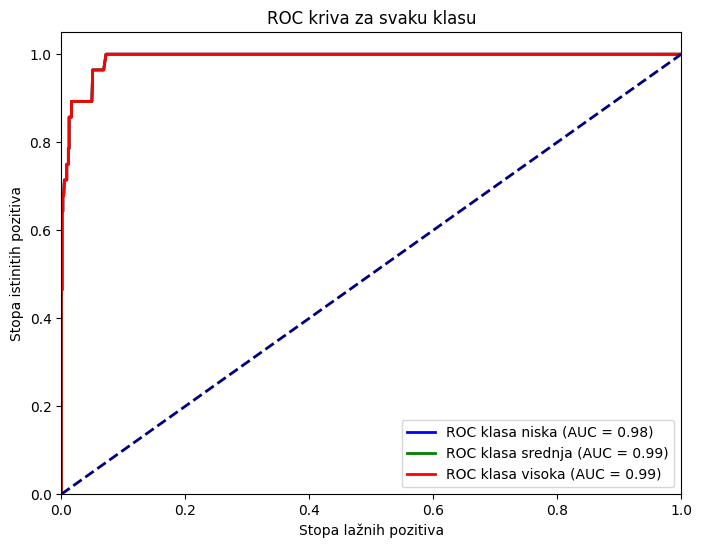

In [48]:
# Inicijalizacija praznih lista za čuvanje vrednosti FPR, TPR i AUC za svaku klasu
fpr_rf = []
tpr_rf = []
roc_auc_rf = []
# Za svaku klasu izračunavanje FPR, TPR i AUC
for i in range(n_classes_rf):
    fpr, tpr, _ = roc_curve(y_val, y_val_probs_rf[:, i], pos_label=best_rf_model.classes_[i])
    roc_auc = auc(fpr, tpr)
    
    fpr_rf.append(fpr)
    tpr_rf.append(tpr)
    roc_auc_rf.append(roc_auc)
    
    print(f"AUC za klasu {best_rf_model.classes_[i]}:", roc_auc)
# Plotovanje ROC krive za svaku klasu
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r']
for i in range(n_classes):
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC klasa {best_rf_model.classes_[i]} (AUC = {roc_auc_rf[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Stopa lažnih pozitiva')
plt.ylabel('Stopa istinitih pozitiva')
plt.title('ROC kriva za svaku klasu')
plt.legend(loc='lower right')
plt.show()


    Visoke AUC vrednosti (blizu 1) za svaku od klasa ukazuju na dobru sposobnost modela da razlikuje između tih klasa. Što je AUC bliže 1, to je bolje.

Izračunavanje Matrice konfuzije:

In [49]:
# Predviđanja na validacionom skupu
y_val_pred_rf = best_rf_model.predict(X_val)

In [50]:
# Izračunavanje matrice konfuzije
confusion_rf = confusion_matrix(y_val, y_val_pred_rf)

print("Matrica konfuzije:\n", confusion_rf)

Matrica konfuzije:
 [[569  10   1]
 [ 25 184   1]
 [  9   1  18]]


    Iz matrice konfuzije možemo videti da postoji relativno mali broj netačnih klasifikacija. Na primer, za klasu "visoka" ima samo nekoliko netačnih klasifikacija.

# Support Vector Machine

Grid Search za SVM model:

In [51]:
# Definisanje parametara za pretragu
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'class_weight': ['balanced', None]
}

In [52]:
# Kreiranje SVM modela
svm_model = SVC(random_state=42)

In [53]:
# Grid Search
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [54]:
# Najbolji model i parametri
best_svm_model = grid_search_svm.best_estimator_
print("Najbolji model:", best_svm_model)

Najbolji model: SVC(C=10, random_state=42)


In [55]:
best_params_svm = grid_search_svm.best_params_
print("Najbolji parametri:", best_params_svm)

Najbolji parametri: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}


Evaluacija SVM modela:

In [56]:
# Predviđanje na validacionom skupu
y_val_pred_svm = best_svm_model.predict(X_val)

In [57]:
# Računanje tačnosti
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print("Tačnost:", accuracy_svm)

Tačnost: 0.9290953545232273


In [58]:
# Izveštaj o klasifikaciji
report_svm = classification_report(y_val, y_val_pred_svm)
print("Izveštaj o klasifikaciji:\n", report_svm)

Izveštaj o klasifikaciji:
               precision    recall  f1-score   support

       niska       0.93      0.98      0.95       580
     srednja       0.93      0.84      0.88       210
      visoka       0.89      0.57      0.70        28

    accuracy                           0.93       818
   macro avg       0.92      0.80      0.84       818
weighted avg       0.93      0.93      0.93       818



Računanje ROC krive i AUC vrednosti za SVM model:

In [59]:
# Računanje verovatnoća pripadnosti klasama
y_val_probs_svm = best_svm_model.decision_function(X_val)

# Inicijalizacija niza za čuvanje rezultata AUC za svaku klasu
roc_auc_svm = []

# Za svaku klasu, računanje ROC krive i AUC
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val, y_val_probs_svm[:, i], pos_label=best_svm_model.classes_[i])
    roc_auc_svm.append(auc(fpr, tpr))

# Ispis AUC vrednosti za svaku klasu
for i, auc_value in enumerate(roc_auc_svm):
    print(f"AUC za klasu {best_svm_model.classes_[i]}:", auc_value)


AUC za klasu niska: 0.9570486815415822
AUC za klasu srednja: 0.9694000626566416
AUC za klasu visoka: 0.9543851717902351


In [60]:
#Računanje matrice konfuzije za SVM model
confusion_svm = confusion_matrix(y_val, y_val_pred_svm)
print("Matrica konfuzije za SVM model:\n", confusion_svm)

Matrica konfuzije za SVM model:
 [[567  12   1]
 [ 32 177   1]
 [ 11   1  16]]


Logistička regresija:

    Tačnost modela na validacionom skupu iznosi oko 0.73, što znači da ovaj model ima pristojnu tačnost, ali može biti poboljšan.
    Model ima relativno nisku preciznost i odziv za klasu "visoka," što sugerira da ima problema u prepoznavanju te klase.
    ROC krive i AUC vrednosti za svaku klasu su relativno niske, što ukazuje na lošu sposobnost modela da razdvaja klase.
    
Random Forest:

    Tačnost modela na validacionom skupu iznosi oko 0.94, što je znatno bolje u odnosu na logističku regresiju.
    Model pokazuje visoke vrednosti preciznosti, odziva i F1-skora za sve tri klase, što ukazuje na dobru sposobnost klasifikacije.
    ROC krive i visoke AUC vrednosti za svaku klasu sugerišu da je model dobro razdvajao klase.
    
SVM (Support Vector Machine):

    Tačnost modela na validacionom skupu iznosi oko 0.93, što je takođe dobro, ali malo niže od rezultata Random Forest-a.
    Model takođe pokazuje dobre vrednosti preciznosti i odziva za sve tri klase.
    ROC krive i AUC vrednosti su slične Random Forest modelu, što ukazuje na dobru sposobnost razdvajanja klasa. 

<!-- Iz rezultata koje smo dobili za tri različita modela možemo izvući nekoliko zaključaka:

    Tačnost modela:
        Random Forest model ima najvišu tačnost na validacionom skupu sa vrednošću od 0.95.
        Logistička regresija i SVM model imaju slične tačnosti oko 0.84.

    Precision, Recall i F1-skor:
       Precision meri tačnost pozitivnih predviđanja. Random Forest model ima najvišu preciznost za sve tri klase.
        Recall meri sposobnost modela da pronađe sve pozitivne instance. Random Forest takođe ima najviši recall za većinu klasa.
        F1-skor je harmonijska sredina između precision i recall i daje celokupnu ocenu performansi modela.

    Klasifikacija po klasama:
        U slučaju svih modela, klasa "niska" ima najbolje rezultate u smislu preciznosti i recall-a, dok je klasa "visoka" teže predvidiva.
        Random Forest model ima najbolje performanse u predviđanju svih klasa.

    Generalizacija:
        Random Forest model ima bolju sposobnost generalizacije na osnovu viših vrednosti preciznosti i recall-a na validacionom skupu.

Opšti zaključak može biti da Random Forest model treniran sa balansiranim težinama daje najbolje performanse na ovim podacima. Logistička regresija i SVM modeli, iako imaju pristojne rezultate, nisu tako efikasni u klasifikaciji kao Random Forest -->

In [62]:
#Testiranje na test skupu: (izabrali smo najbolji model za klasifikaciju --> Random Forest)
# Predviđanje na test skupu
y_test_pred_rf = best_rf_model.predict(X_test)

# Evaluacija modela na test skupu
# Računanje tačnosti
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Tačnost na test skupu:", accuracy_test_rf)

Tačnost na test skupu: 0.9474969474969475


In [63]:
# Izveštaj o klasifikaciji na test skupu
report_test_rf = classification_report(y_test, y_test_pred_rf)
print("Izveštaj o klasifikaciji na test skupu:\n", report_test_rf)


Izveštaj o klasifikaciji na test skupu:
               precision    recall  f1-score   support

       niska       0.95      0.99      0.97       591
     srednja       0.95      0.89      0.92       197
      visoka       0.76      0.52      0.62        31

    accuracy                           0.95       819
   macro avg       0.89      0.80      0.84       819
weighted avg       0.95      0.95      0.94       819



In [75]:
# Računanje matrice konfuzije na test skupu
confusion_test_rf = confusion_matrix(y_test, y_test_pred_rf)
print("Matrica konfuzije na test skupu:\n", confusion_test_rf)

Matrica konfuzije na test skupu:
 [[584   6   1]
 [ 17 176   4]
 [ 11   4  16]]


Random Forest modelima visoku tačnost na test skupu  sa tačnošću približno 94.75%. 
Ovo ukazuje na na dobru sposobnost modela da klasifikuje instance u ispravne kategorije.

<!-- Ovo ukazuje na to da model dobro generalizuje i radi dobro na novim podacima koje nije video tokom treninga i validacije. -->

Precision, recall i F1-score metrike za svaku od klasa pružaju detaljniji uvid u performanse modela. Model ima dobar F1-score za klasu "niska," što ukazuje na dobru ravnotežu između preciznosti i odziva za ovu klasu. Za klasu "srednja" takođe su rezultati dobri, dok je za klasu "visoka" F1-score niži, što znači da model ima veći broj lažnih negativa za ovu klasu.

Matrica konfuzije prikazuje tačne i netačne klasifikacije za svaku klasu. Možemo videti da model dobro razdvaja klasu "niska," ali ima poteškoća u razdvajanju klase "visoka" od ostalih klasa.

Random Forest model se čini kao dobar izbor za ovaj problem klasifikacije ocena atrakcija na osnovu rezultata na test skupu.

Prikaz stabla odlučivanja:

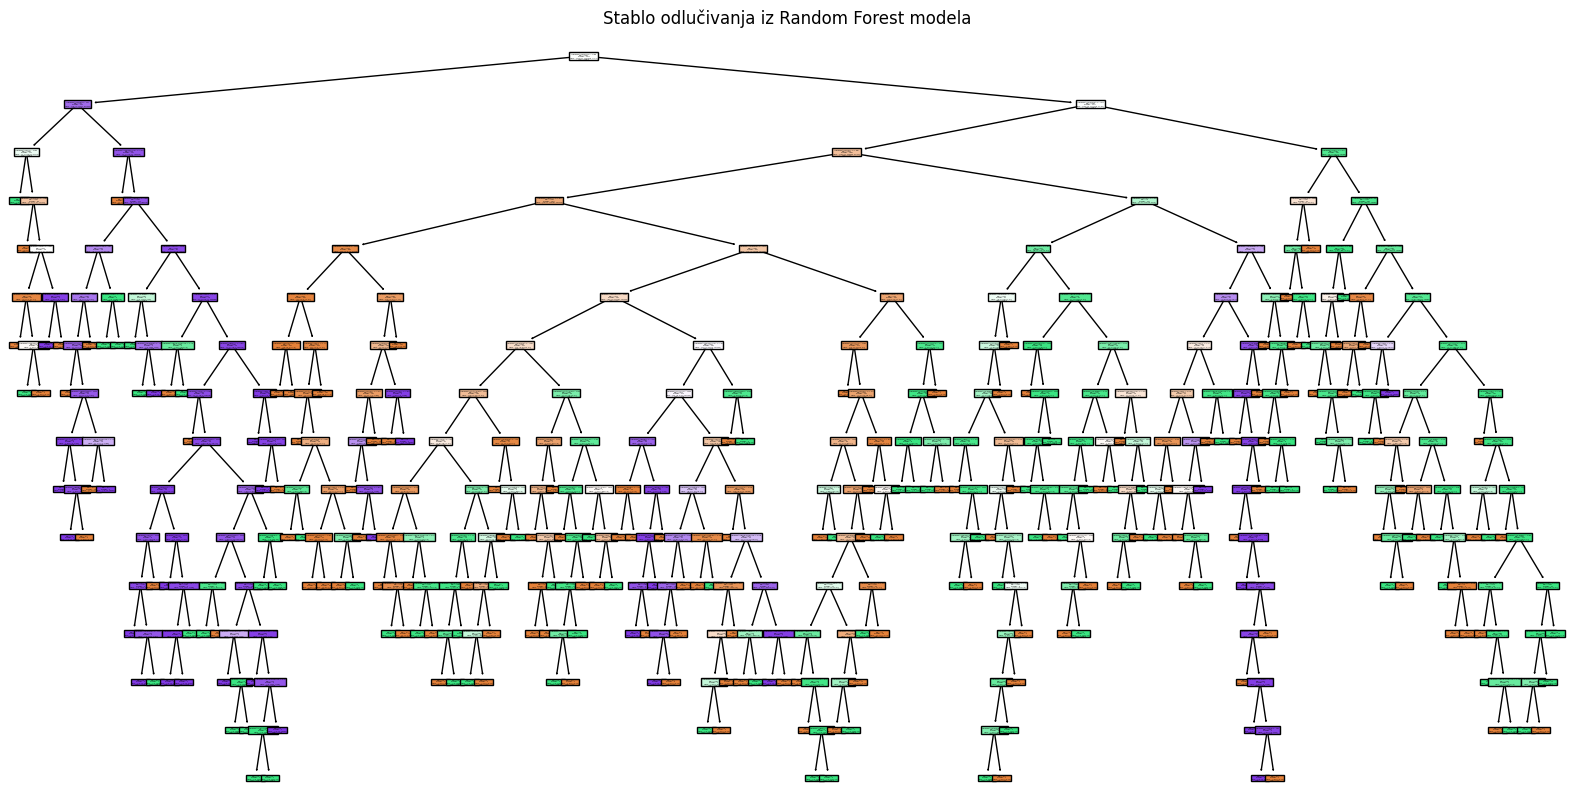

In [69]:
# Biramo jedno stablo iz modela(npr. prvo stablo)
selected_tree = best_rf_model.estimators_[0]

# Konvertovanje imena atributa u listu
attribute_names = list(X_train.columns)

# Prikaz stabla odlučivanja
plt.figure(figsize=(20, 10))
plot_tree(selected_tree, filled=True, feature_names=attribute_names, class_names=["niska", "srednja", "visoka"])
plt.title('Stablo odlučivanja iz Random Forest modela')
plt.show()

 Matrica konfuzije

Matrica konfuzije:
[[435  82  63]
 [ 38 138  34]
 [  1   0  27]]


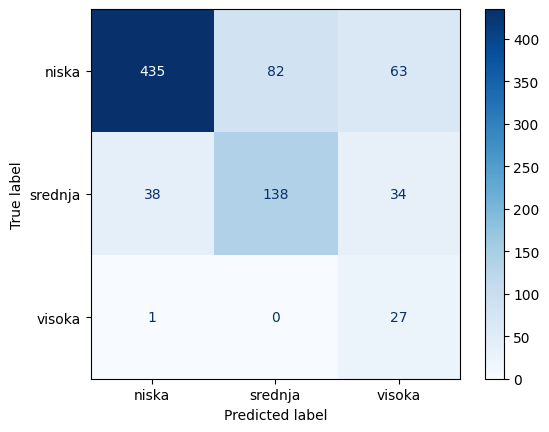

In [76]:
# Kreiranje matrice konfuzije
confusion_test_rf = confusion_matrix(y_test, y_test_pred_rf)
class_names = ["niska", "srednja", "visoka"]
# Ispis matrice konfuzije
disp = ConfusionMatrixDisplay(confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
print("Matrica konfuzije:")
print(confusion)

Ova matrica konfuzije prikazuje tačne i netačne klasifikacije za svaku od klasa na test skupu. Evo analize rezultata:

    Za klasu "niska": Model je tačno klasifikovao većinu instanci u ovu klasu, što se vidi po visokim vrednostima na glavnoj dijagonali matrice konfuzije. Postoji mali broj lažnih pozitiva i lažnih negativa, što ukazuje na dobru preciznost i odziv za ovu klasu.

    Za klasu "srednja": Model takođe pokazuje dobru tačnost za ovu klasu, s većinom tačnih klasifikacija. Preciznost i odziv su visoki, što ukazuje na dobar balans između tačnosti i odziva.

    Za klasu "visoka": Model ima poteškoća u klasifikaciji ove klase, što se vidi po nižim vrednostima na glavnoj dijagonali matrice. Postoji veći broj lažnih negativa, što znači da model često klasifikuje instance iz ove klase kao druge klase.

Opšti zaključak je da Random Forest model dobro radi za klasifikaciju klasa "niska" i "srednja," ali može se unaprediti za klasu "visoka."

In [72]:
accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"Tačnost: {accuracy:.2f}")

precision = precision_score(y_test, y_test_pred_rf, average='weighted')
print(f"Preciznost: {precision:.2f}")

recall = recall_score(y_test, y_test_pred_rf, average='weighted')
print(f"Odziv: {recall:.2f}")

f1 = f1_score(y_test, y_test_pred_rf, average='weighted')
print(f"F1-skor: {f1:.2f}")


Tačnost: 0.95
Preciznost: 0.95
Odziv: 0.95
F1-skor: 0.94


    Tačnost (Accuracy): Model ima tačnost od 0.95, što znači da tačno klasifikuje 95% instanci na test skupu. Ovo ukazuje na dobar ukupan performans modela.

    Preciznost (Precision): Preciznost je 0.95, što znači da je prosečna preciznost modela za sve klase visoka. To znači da je većina pozitivnih predviđanja tačna i da ima malo lažnih pozitiva.

    Odziv (Recall): Odziv je takođe 0.95, što ukazuje na dobar odziv modela za sve klase. To znači da model dobro pronalazi većinu pozitivnih instanci i ima malo lažnih negativa.

    F1-skor: F1-skor je 0.94, što je harmonična sredina između preciznosti i odziva. Ovo je dobar pokazatelj balansa između tačnosti i kompletnosti modela.
    
U suštini, ovi rezultati ukazuju na to da Random Forest model dobro radi na test skupu i ima visoke performanse u klasifikaciji. 